### Interpolação de dados de tempo de trânsito da onda sísmica para a análise de velocidade das camadas e posterior Correção de Normal Moveout (NMO)

O objetivo principal do método sísmico de exploração é extrair informações estruturais de
subsuperfície a partir dos dados sísmicos. Dados estes que são coletados em campo no domínio
do tempo, enquanto o ideal seria obter uma imagem em profundidade. O fator que conecta
estes dois domínios é a velocidade da onda sísmica. Por este motivo, a velocidade é considerada
uma das propriedades físicas mais importantes para gerar uma imagem de boa qualidade das
estruturas geológicas do interior da Terra.

**Equação do tempo de trânsito da onda refletida para modelo geológico de duas camadas com refletor horizontal**

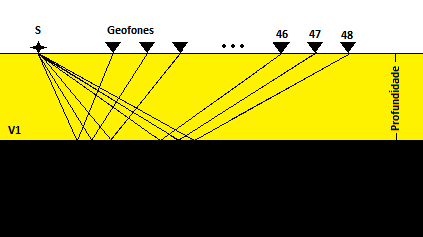

Para um meio formado por duas camadas duas
camadas homogêneas e isotrópicas, separadas por um refletor horizontalizado, o tempo de
reflexão de uma onda sísmica é dado por

$$t^2(x) = t_{0}^{2} + \frac{x^2}{V^{2}_{rms}}$$

em que t(x) é o tempo de reflexão que a onda toma para partir da fonte, atingir o refletor
e retornar até o receptor, x é a distância entre fonte e receptor, $t_0$ é o tempo de reflexão para
x = 0 e V é a velocidade média do meio.

Note que esta expressão possui o formato de uma hipérbole, no entanto, o modelo geológico
por ela representado garante a horizontalidade dos refletores. Este efeito ocorre por conta do
atraso associado ao termo $\frac{x^2}{V^{2}_{rms}}$, que representa a influência do afastamento dos receptores com
relação à fonte sísmica. Este tempo extra é denominado Normal Moveout (NMO).

A correção NMO é dada por

$$\Delta t_{NMO} = t(x) - t_0$$

Se for feita de forma incoerente, o resultado deste procedimento pode apresentar subcorreção ou sobrecorreção. Por isso existe a necessidade de realizar a **análise de velocidades**.

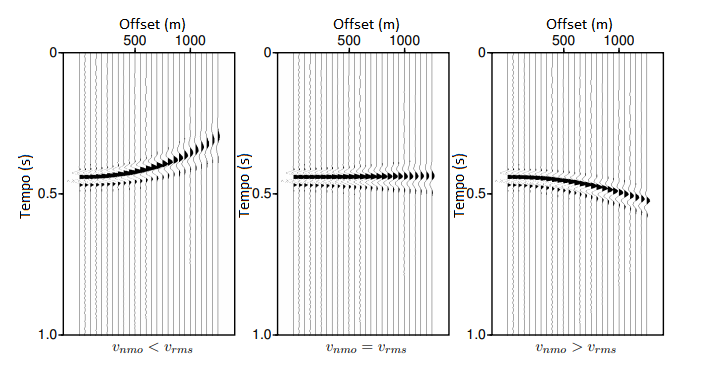

Neste trabalho utilizou-se do método de Lagrange para interpolar os dados do tempo de trânsito da onda sísmica para realizar o método $t^2 - x^2$ de análise de velocidades para posterior correção NMO de um refletor sísmico horizontal num meio homogêneo e isotrópico

**Importando bibliotecas**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Função de interpolação pelo Método de Lagrange**

In [3]:
def interp_Lagrange(x, y, a):
    coeficientes = []
    for indice in range(len(x)):
        L = 1
        for j in range(len(x)):
            if indice != j:
                L *= (a - x[j])/(x[indice] - x[j])
        coeficientes.append(L)
    pn = 0
    for i in range(len(coeficientes)):
        pn += y[i]*coeficientes[i]
    return pn

**Função para obter os dados de tempo de trânsito da onda sísmica**

In [4]:
def refletida(vp, H, source, offset, x):
    reflect_P = []
    for i in range(len(x))
        reflect_P.append((np.sqrt(((x[i]-source)**2 + (2*H)**2)/vp**2)))
    return reflect_P

**Construção da distribuição dos geofones (variável x) e do aplicação da função **$\textit{refletida}$****.

In [5]:
x = np.arange(0, 4100, 100)
t_pp = refletida(vp=2500, H=500, source=0, offset=20, x=x)

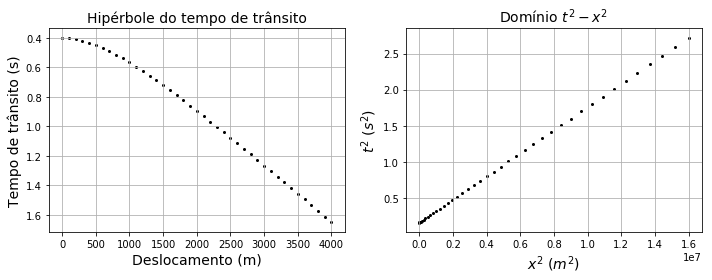

In [20]:
fig,axes = plt.subplots(ncols = 2, figsize=(10,4))

axes[0].scatter(x, t_pp, c = 'black', s=4)
axes[0].set_title('Hipérbole do tempo de trânsito', fontsize=14)

axes[0].set_xlabel('Deslocamento (m)', fontsize=14)
axes[0].set_ylabel('Tempo de trânsito (s)', fontsize=14)
axes[0].invert_yaxis()

axes[1].scatter(np.asarray(x)**2, np.asarray(t_pp)**2, c='black', s=4)
axes[1].set_title('Domínio $t^2 - x^2$', fontsize=14)
axes[1].set_xlabel('$x^2 \ (m^2)$', fontsize=14)
axes[1].set_ylabel('$t^2 \ (s^2)$', fontsize=14)

for ax in axes:
    ax.grid()
    
plt.tight_layout()


**Criando pontos a serem interpolados**

In [7]:
x_inc = np.zeros(len(x))
for i in range(len(x)-1):
    x_inc[i] = ((x[i+1] - x[i])/2) + x[i+1]
    
y_inc = np.zeros(len(x_inc))
for j in range(len(x_inc)):
    y_inc[j] = interp_Lagrange(x, t_pp, x_inc[j])

**Resultados**

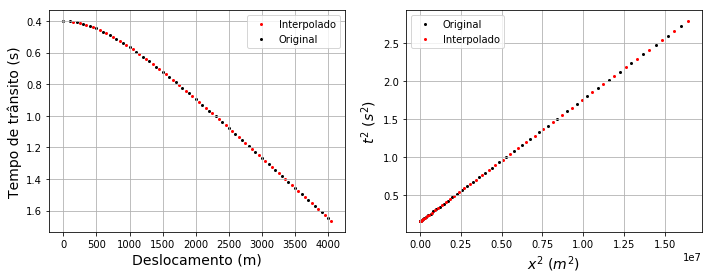

In [9]:
fig,axes = plt.subplots(ncols = 2, figsize=(10,4))

axes[0].scatter(x_inc[:-1], y_inc[:-1], c='red', s=4, label='Interpolado')
axes[0].scatter(x, t_pp, c = 'black', s=4, label='Original')

axes[0].set_xlabel('Deslocamento (m)', fontsize=14)
axes[0].set_ylabel('Tempo de trânsito (s)', fontsize=14)
axes[0].invert_yaxis()

axes[1].scatter(np.asarray(x)**2, np.asarray(t_pp)**2, c='black', s=4, label='Original')
axes[1].scatter(np.asarray(x_inc[:-1])**2, np.asarray(y_inc[:-1])**2, c='red', s=4, label='Interpolado')

axes[1].set_xlabel('$x^2 \ (m^2)$', fontsize=14)
axes[1].set_ylabel('$t^2 \ (s^2)$', fontsize=14)

for ax in axes:
    ax.grid()
    ax.legend()
    
plt.tight_layout()

**Função para correção NMO**

In [10]:
def nmo_correcao(t):
    t_nmo = np.zeros(len(t))
    for i in range(len(t)):
        t_nmo[i] = t[i] - t[0]
    return t - t_nmo

In [11]:
t_nmo = nmo_correcao(t_pp)

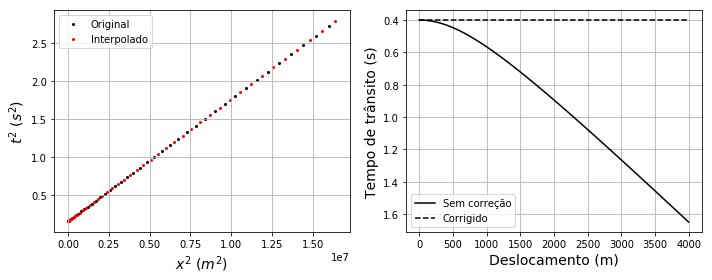

In [23]:
fig,axes = plt.subplots(ncols = 2, figsize=(10,4))

axes[1].plot(x, t_pp, c = 'black', label='Sem correção')
axes[1].plot(x, t_nmo, c = 'black', label='Corrigido', ls='--')

axes[1].set_xlabel('Deslocamento (m)', fontsize=14)
axes[1].set_ylabel('Tempo de trânsito (s)', fontsize=14)
axes[1].invert_yaxis()

axes[0].scatter(np.asarray(x)**2, np.asarray(t_pp)**2, c='black', s=4, label='Original')
axes[0].scatter(np.asarray(x_inc[:-1])**2, np.asarray(y_inc[:-1])**2, c='red', s=4, label='Interpolado')

axes[0].set_xlabel('$x^2 \ (m^2)$', fontsize=14)
axes[0].set_ylabel('$t^2 \ (s^2)$', fontsize=14)

for ax in axes:
    ax.grid()
    ax.legend()
    
plt.tight_layout()